In [124]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import utilities as utils
import time
from sklearn.decomposition import PCA
from logclass import log

folder = "full_5"

LOG = log.log(fname = "./outputs/" + folder + "/logfile.json")


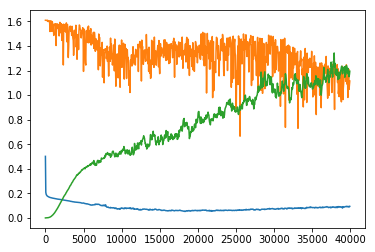

In [125]:
plt.plot(LOG.data[:,0],LOG.data[:,1])
plt.plot(LOG.data[:,0],LOG.data[:,2])

plt.plot(LOG.data[:,0],-LOG.data[:,-1])
plt.show()

In [126]:
par = utils.read_dict("./outputs/" + folder + "/training_params")

enc_shape = [par["ntestbatch"]*par["batchsize"],-1,par["nenc"]]
lab_shape = [par["ntestbatch"]*par["batchsize"],-1,2]
pro_shape = [par["ntestbatch"]*par["batchsize"],-1,par["nstate"]]
sys_shape = [par["nstate"],par["nenc"],par["nenc"]]
off_shape = [par["nstate"],par["nenc"]]

par

{'MINE_grad_reg': 0,
 'batchsize': 8,
 'dataset': 'nascar',
 'device': '0',
 'ent_loss': False,
 'epochs': 40000,
 'likloss': 5.0,
 'nenc': 10,
 'nstate': 5,
 'ntestbatch': 100,
 'regloss': 1,
 'seed': 0,
 'syspick': 'logistic',
 'tag': 'full',
 'train_mode': 'full'}

In [127]:
test_enc = np.reshape(np.loadtxt("./outputs/" + folder + "/nascar_enc.csv"),enc_shape)
test_lab = np.reshape(np.loadtxt("./outputs/" + folder + "/nascar_lab.csv"),lab_shape)
test_sys = np.reshape(np.loadtxt("./outputs/" + folder + "/nascar_sys.csv"),sys_shape)
test_prob = np.reshape(np.loadtxt("./outputs/" + folder + "/nascar_pro.csv"),pro_shape)
test_off = np.reshape(np.loadtxt("./outputs/" + folder + "/nascar_O.csv"),off_shape)

print(test_enc.shape)

(800, 10, 10)


In [128]:
S1 = np.reshape(np.loadtxt("./outputs/" + folder + "/nascar_syspick_0.csv"),[par["nenc"],par["nstate"]]).transpose()
S2 = np.reshape(np.loadtxt("./outputs/" + folder + "/nascar_syspick_1.csv"),[par["nstate"]])


In [129]:
flatenc = np.reshape(test_enc,[-1,par["nenc"]])

pca = PCA(svd_solver='full')
pcaenc=np.reshape(pca.fit_transform(flatenc),enc_shape)


flatpcaenc = np.reshape(pcaenc,[-1,par["nenc"]])

np.mean((pcaenc - test_enc)**2)

0.82763873649787856

In [130]:
ev=pca.explained_variance_
comp = pca.components_

print(np.cumsum(ev)/np.sum(ev))

[np.max(pcaenc[:,:,k])-np.min(pcaenc[:,:,k]) for k in range(par["nenc"])]

[ 0.57526387  0.94485713  0.98461779  0.99539379  0.99799327  0.99920362
  0.99965786  0.99985546  0.99995668  1.        ]


[5.3251978365723023,
 6.1494962704654164,
 3.4500541112077028,
 1.3916052824620211,
 0.67439849732933776,
 0.36236263781042,
 0.30939939426463642,
 0.17691203289223145,
 0.11601637893707645,
 0.083672928317811479]

In [131]:
def labtocolor(lab):
    if par["dataset"] == 'two_moving_shapes':
        return np.array([0,0,0])
    hsv = np.array([(np.pi + np.arctan2(lab[0],lab[1]))/(2*np.pi),1,np.sqrt(((lab[0]))**2 + ((lab[1])/3.)**2)/np.sqrt(2)])
    return mpl.colors.hsv_to_rgb(hsv)

labtocolor(test_lab[-2,0])

def statetocolor(prob):
        
    nstate = np.float32(len(prob))
    hsv = np.array([np.float32(np.argmax(prob))/(nstate - 1.),1,1])
    return mpl.colors.hsv_to_rgb(hsv)


test_enc.shape

(800, 10, 10)

In [132]:
pcacor = np.corrcoef(np.concatenate([flatpcaenc[:,:2],np.reshape(test_lab,[-1,2])],axis = 1).transpose())

print(np.round(pcacor,2))

print(np.linalg.det(pcacor[2:,:2]))

[[ 1.    0.    0.26  0.75]
 [ 0.    1.    0.04  0.18]
 [ 0.26  0.04  1.    0.16]
 [ 0.75  0.18  0.16  1.  ]]
0.0134531514441


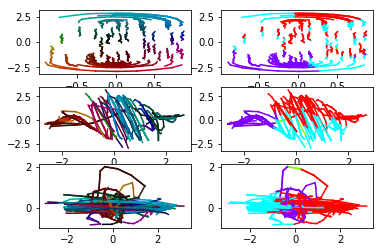

In [133]:
fig,((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3,2)
for k in range(0,len(pcaenc),10):
    for j in range(0,min(len(pcaenc[k])-1,10)):
        ax1.plot(test_lab[k,j:j+2,0],test_lab[k,j:j+2,1],color=labtocolor(test_lab[k,j]))
        ax2.plot(test_lab[k,j:j+2,0],test_lab[k,j:j+2,1],color=statetocolor(test_prob[k,j]))
        ax3.plot(pcaenc[k,j:j+2,0],pcaenc[k,j:j+2,1],color=labtocolor(test_lab[k,j]))
        ax4.plot(pcaenc[k,j:j+2,0],pcaenc[k,j:j+2,1],color=statetocolor(test_prob[k,j]))
        ax5.plot(pcaenc[k,j:j+2,1],pcaenc[k,j:j+2,2],color=labtocolor(test_lab[k,j]))
        ax6.plot(pcaenc[k,j:j+2,1],pcaenc[k,j:j+2,2],color=statetocolor(test_prob[k,j]))

plt.show()

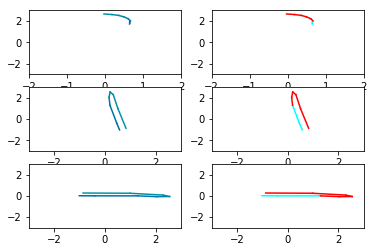

In [138]:
fig,((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3,2)

k = 1
for j in range(len(test_lab[j])-2):
    ax1.plot(test_lab[k,j:j+2,0],test_lab[k,j:j+2,1],color=labtocolor(test_lab[k,j]))
    ax2.plot(test_lab[k,j:j+2,0],test_lab[k,j:j+2,1],color=statetocolor(test_prob[k,j]))
    ax3.plot(pcaenc[k,j:j+2,0],pcaenc[k,j:j+2,1],color=labtocolor(test_lab[k,j]))
    ax4.plot(pcaenc[k,j:j+2,0],pcaenc[k,j:j+2,1],color=statetocolor(test_prob[k,j]))
    ax5.plot(pcaenc[k,j:j+2,1],pcaenc[k,j:j+2,2],color=labtocolor(test_lab[k,j]))
    ax6.plot(pcaenc[k,j:j+2,1],pcaenc[k,j:j+2,2],color=statetocolor(test_prob[k,j]))
    
ax1.set_xlim([-2,2])
ax1.set_ylim([-3,3])

ax2.set_xlim([-2,2])
ax2.set_ylim([-3,3])

ax3.set_xlim([-3,3])
ax3.set_ylim([-3,3])

ax4.set_xlim([-3,3])
ax4.set_ylim([-3,3])

ax5.set_xlim([-3,3])
ax5.set_ylim([-3,3])

ax6.set_xlim([-3,3])
ax6.set_ylim([-3,3])

plt.show()

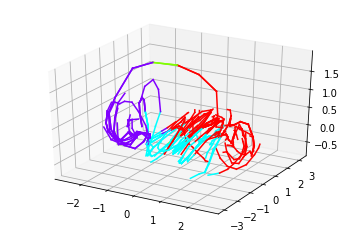

In [135]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for k in range(0,len(pcaenc),10):
    for j in range(len(pcaenc[k])-1):
        ax.plot(pcaenc[k,j:j+2,0],pcaenc[k,j:j+2,1],pcaenc[k,j:j+2,2],color=statetocolor(test_prob[k,j]))
        
plt.show()

In [120]:
def softmax(x):
    return np.exp(x)/np.sum(np.exp(x))

def getsys(x,y,a1,a2):
    out = np.dot(S1,pca.inverse_transform(np.append([x,y],np.zeros(par["nenc"]-2)))) + S2
    return np.argmax(softmax(out))

def getsys_full_pca(x):
    out = np.dot(S1,pca.inverse_transform(x)) + S2
    return np.argmax(softmax(out))

def getsys_full(x):
    out = np.dot(S1,x) + S2
    return np.argmax(softmax(out))

def getsysprob_full(x):
    out = np.dot(S1,x) + S2
    return softmax(out)


(5, 10, 10)


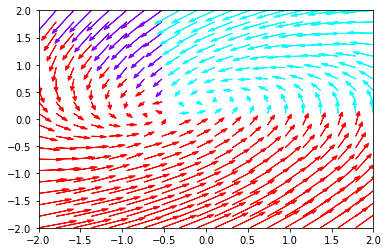

In [121]:
plt.ylim([-2,2])
plt.xlim(-2,2)
print(test_sys.shape)
scale = 1

axis = [0,1]

offset = 0
offax = 2

for a in np.linspace(-2,2,20):
    for b in np.linspace(-2,2,20):
        
        temp = np.zeros(par["nenc"])
        
        temp[axis[0]] = a
        temp[axis[1]] = b
        temp[offax] = offset

        sysid = getsys(a,b,axis[0],axis[1])
        #sysid = getsys_full(temp)
        sys = test_sys[sysid]
        off = test_off[sysid]
        
        vec = pca.transform([(np.dot(sys,pca.inverse_transform([temp])[0]) + off)/scale])[0,axis]
        plt.arrow(a,b,vec[0],vec[1],color=mpl.colors.hsv_to_rgb([sysid/(test_sys.shape[0]-1),1,1]),head_width = .05,width = .001)
plt.show()

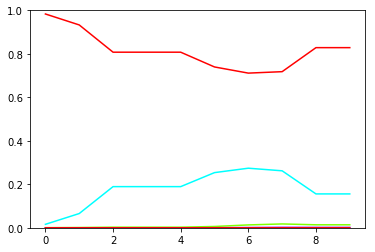

In [122]:
ii = 12
plt.ylim(0,1)
for p in range(test_prob.shape[2]):
    plt.plot(range(len(test_prob[ii])),test_prob[ii,:,p],color = mpl.colors.hsv_to_rgb([p/(par["nstate"]-1),1,1]))
plt.show()

In [123]:
test_lab.shape

(800, 10, 2)